<a href="https://colab.research.google.com/github/uervitonsantos/Algoritmo-PSO-para-otimiza-o-de-custo-de-manuten-o-preventiva/blob/main/Algoritmo_PSO_para_otimiza_o_de_custo_de_manuten_o_preventiva_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Algoritmo de otimização de enxame de partículas

https://medium.com/towards-data-science/complete-step-by-step-particle-swarm-optimization-algorithm-from-scratch-74471d064f91#caa0

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# A função custo_manutencao representa a função de custo que você deseja minimizar. 
# Ela recebe como entrada um vetor x que contém as variáveis de decisão do problema.
# 
def custo_manutencao(x):
    # aqui será necessario implementar a função de custo, que 
    # pode ser baseada em um modelo de custo de manutenção preventiva.
    return 2*np.sum(x)

In [11]:
# Define o tamanho da população e o número de dimensões
tam_populacao = 10
num_dimensoes = 5

# Define os limites inferior e superior para as dimensões
limites_inferiores = np.zeros(num_dimensoes)
limites_superiores = np.ones(num_dimensoes) * 10

In [12]:
# Define a função de atualização da posição do enxame
def atualiza_posicao_enxame(x, v, p_best, g_best, w, c1, c2):
    r1 = np.random.rand(num_dimensoes)
    r2 = np.random.rand(num_dimensoes)
    v = w*v + c1*r1*(p_best - x) + c2*r2*(g_best - x)
    x = x + v
    return x, v

In [39]:
# Define os parâmetros do PSO
num_iteracoes = 1000
w = 0.5
c1 = 1.5
c2 = 1.5

In [40]:
# Inicializa a população e a velocidade do enxame
populacao = np.random.uniform(limites_inferiores, limites_superiores, (tam_populacao, num_dimensoes))
velocidade = np.zeros((tam_populacao, num_dimensoes))

In [41]:
# Inicializa as melhores posições da população e a melhor posição global
p_best = populacao.copy()
custo_p_best = np.zeros(tam_populacao)
for i in range(tam_populacao):
    custo_p_best[i] = custo_manutencao(populacao[i])
g_best_index = np.argmin(custo_p_best)
g_best = p_best[g_best_index].copy()

# Executa o PSO
for i in range(num_iteracoes):
    for j in range(tam_populacao):
        custo_j = custo_manutencao(populacao[j])
        if custo_j < custo_p_best[j]:
            p_best[j] = populacao[j].copy()
            custo_p_best[j] = custo_j
        if custo_j < custo_manutencao(g_best):
            g_best = populacao[j].copy()
    populacao, velocidade = atualiza_posicao_enxame(populacao, velocidade, p_best, g_best, w, c1, c2)

In [42]:
# Exibe a solução encontrada
print("Melhor posição encontrada:", g_best)
print("Custo mínimo encontrado:", custo_manutencao(g_best))

Melhor posição encontrada: [-14.24867841 -17.91189717  -8.10688658  -0.06163811   6.30092872]
Custo mínimo encontrado: -68.05634308589937


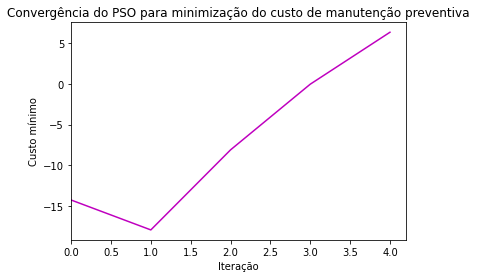

In [43]:
# Plotagem do gráfico de convergência
plt.plot(g_best, c='m')
plt.xlabel('Iteração')
plt.ylabel('Custo mínimo')
plt.title('Convergência do PSO para minimização do custo de manutenção preventiva')
plt.xlim(0)
plt.show()